<p style="color:#050166; text-align:center; font-size:36px; font-weight:bold;">
Session #2 - Introduction to PyTorch
</p>

    

<p style="color:#6ABCF9; text-align:center; font-size:36px; font-weight:bold;">
Advanced AI
</p>

<p style="text-align:center;">
  <img src="Captura de pantalla 2025-08-27 a las 21.22.58.png" alt="my image" width="120" height="80">
</p>

***<p style="text-align: center;">Prof. Beatriz Blanc</p>***
***<p style="text-align: center;">bblanc@faculty.ie.edu</p>***

***

### This session covers:

1. Introduction: what is PyTorch?
2. Basic elements
    1. Tensors
    2. GPU tensors
    3. Basic operations with tensors
3. Autograd & computationg graphs
4. Creating our first ML model with PyTorch

***

<p style="text-align:left;">
  <img src="Captura de pantalla 2025-08-27 a las 21.39.57.png" alt="my image" width="400" height="200">
</p>

## 1. Introduction
**[PyTorch](https://docs.pytorch.org/docs/stable/index.html)**: short for Python Torch, an open-source machine learning library based on the Torch library, which is developed mainly by Facebook AI Research (FAIR)

- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A **replacement for NumPy to use the power of GPUs** (as it provides tensor computing capability with strong acceleration via GPUs)
    - **Deep learning research platform** that provides maximum flexibility and speed. One of its main advantages is that it provides Deep Neural Networks built on tape-based **auto-differentiation system**


- **pros:** 
    - Much easier to use, debug and understand than TensorFlow (the most used Deep Learning package so far, though it is losing popularity towards PyTorch).
    - It's *Pythonic*, feels familiar to developers who have used Python previously
    - Clean support for dynamic graphs
    - Organizational backing from Facebook and the [Linux Foundation](https://pytorch.org/blog/pytorchfoundation/)
    - Blend of high level and low level APIs
- **cons:**
    - Less mature than alternatives
    - Limited references / resources outside of the official documentation

<br>
<br>

## 2. Basic elements of PyTorch

PyTorch is a scientific computing package similar to NumPy. Just like in Numpy we use arrays, in PyTorch the fundamental data structure is called **tensor**.

## 2.1. Torch tensor

### Introduction to `torch.tensor`

In the context of
deep learning, tensors refer to the generalization of vectors and matrices to an arbitrary
number of dimensions. Another name for the same
concept is **multidimensional array**. 

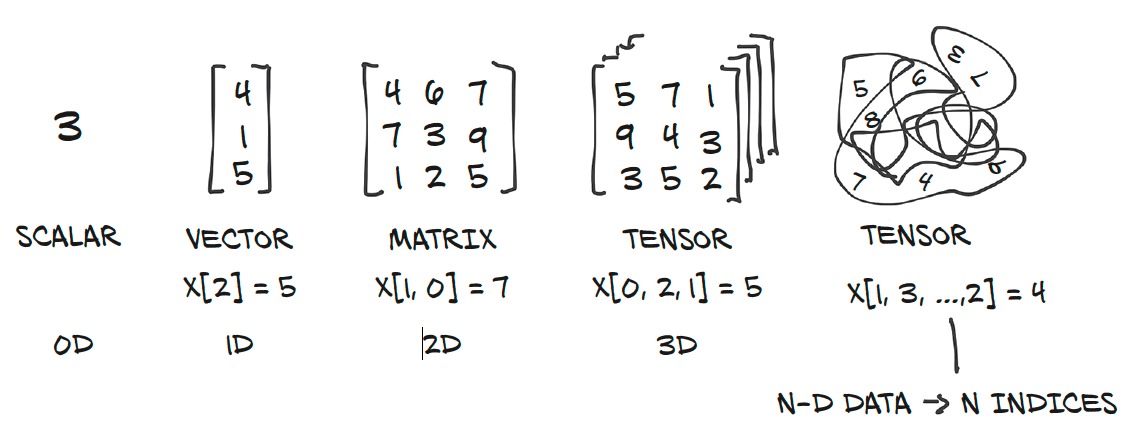

<small style="color:gray;">Stevens, E. and Antiga, L. (2020) Deep Learning with Pytorch.</small>


PyTorch is not the only library that deals with multidimensional arrays. NumPy is by
far the most popular multidimensional array library. But compared to NumPy, PyTorch has some advantages:

- the ability to perform very fast operations on graphical processing units (GPUs)
- distribute operations on multiple devices or machines
- keep track of the graph of computations that created them

We can create a tensor from a single number, a vector, a matrix or any other array, just like we used to do in NumPy. In fact we can also create NumPy arrays and convert them to tensors with the `from_numpy()` method of a `torch.tensor`

**Let's get started and create our first ``tensor``**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch


Some basic **attributes of a `torch.tensor`**:
* `tensor.shape`: return shape of the array
* `tensor.dtype`: return the data type of the data in the array
* `tensor.device`: return the device (e.g. CPU, GPU, etc.) where the tensor lies in
* `tensor.requires_grad`: return whether we can compute the gradient with respect to the tensor automatically or not

1.  We will start by creating the simplest `torch.tensor`, which will be a one-dimensional array representing a scalar $c = 5$ with type `float32`

In [2]:
# Use torch.tensor to create a tensor. In the first positional argument
## you will specify the object that you want to convert to a tensor. You
## can specify the tensor type setting the tensor dtype to torch.float32
## Call your tensor my_tensor

# Your code here!
my_tensor = torch.tensor(data=5, dtype=torch.float32)

In [3]:
# Let's print our tensor and check that we defined it correctly
## It should have 0 dimension (as it is a scalar)
## dtype torch.float32 as we have set it, and
## let's also check in which device it is! (by default)
## it will be in the CPU but we can also put our tensor in the
## GPU for faster operations and better performance. We will discuss
## more about this later. 
print(f"my_tensor: shape {my_tensor.shape} - dtype: {my_tensor.dtype} - device: {my_tensor.device}")

my_tensor: shape torch.Size([]) - dtype: torch.float32 - device: cpu


2. Now, let's get a bit more sophisticated. Create one array representing a row vector $\textbf{v} = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$ with type `int32`

In [4]:
# You can follow the same procedure as in the previous exercise, 
## It is suggested to also create a numpy array with the characteristics
## mentioned and then move it to a torch.tensor object to practice the
## NumPy/PyTorch conversion.
##Call your tensor mt_2

# Your code here!
mt_2a = np.array([1,2,3])

mt_2 = torch.tensor(data = torch.from_numpy(mt_2a), dtype = torch.int32)

/tmp/ipykernel_8419/2715294607.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mt_2 = torch.tensor(data = torch.from_numpy(mt_2a), dtype = torch.int32)


In [5]:
# Let's print our tensor and check that we defined it correctly
print(f"mt_2: shape {mt_2.shape} - dtype: {mt_2.dtype} - device: {mt_2.device}")
print(mt_2)

mt_2: shape torch.Size([3]) - dtype: torch.int32 - device: cpu
tensor([1, 2, 3], dtype=torch.int32)


3. Create one array representing a matrix $\textbf{A} = \begin{bmatrix} 1 & 2 & 3 & 4 \\ 3 & 4 & 5 & 6 \\ 6 & 7 & 8 & 9 \end{bmatrix}$ whose type is inferred by PyTorch

In [6]:
# Call your tensor mt_3

# Your code here!

mt_3a = np.array([[1,2,3,4],[3,4,5,6],[6,7,8,9]])

mt_3 = torch.tensor(data = torch.from_numpy(mt_3a))

# Let's print that everything is ok
# Your code here!

print(mt_3)

tensor([[1, 2, 3, 4],
        [3, 4, 5, 6],
        [6, 7, 8, 9]])


/tmp/ipykernel_8419/2811211949.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mt_3 = torch.tensor(data = torch.from_numpy(mt_3a))


In [7]:
print(f"mt_3: shape {mt_3.shape} - dtype: {mt_3.dtype} - device: {mt_3.device}")
print(mt_3)

mt_3: shape torch.Size([3, 4]) - dtype: torch.int64 - device: cpu
tensor([[1, 2, 3, 4],
        [3, 4, 5, 6],
        [6, 7, 8, 9]])


<br>

***Note**: computations happening in neural networks are typically
executed with 32-bit floating-point precision. Higher precision, like 64-bit, will
not buy improvements in the accuracy of a model and will require more memory and
computing time.<br>
When **mixing input types** in operations, the inputs are **converted to the larger type
automatically**.*

<br>

We can also create some special tensors.

4. Create an array of 5 elements of all ones, so $\textbf{v} = \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \end{bmatrix}$ with ``torch.ones``

In [8]:
# Your code here!
print(torch.ones(5))

tensor([1., 1., 1., 1., 1.])


5. Create an array with all zeros (e.g. $\begin{bmatrix} 0 & 0 & 0 & 0 & 0 \end{bmatrix}$) with `torch.zeros`

In [9]:
# Your code here!
print(torch.zeros(5))

tensor([0., 0., 0., 0., 0.])


6. Create an array with all ones (e.g. $\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$). 
The syntax is slightly different from NumPy:
> **NumPy:** `data = np.ones((3, 3))` (i.e. we pass a tuple as argument)  
> **PyTorch:** `data = torch.ones(3, 3)` (i.e. we pass two integers as arguments)

In [10]:
# Your code here!
print(torch.ones(3,3, dtype=torch.int32))

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


7. Create an array with elements ranging from $0$ to $4$ (i.e. $\begin{bmatrix} 0 & 1 & 2 & 3 & 4 \end{bmatrix}$). With `torch.arange`

In [11]:
# Your code here!
print(torch.arange(0,5))

tensor([0, 1, 2, 3, 4])


## 2.2 GPU  tensors

So far we have created all of our tesors in the CPU. However, 
PyTorch tensors also can be stored on a different kind of processor: a **graphics
processing unit (GPU)**. <br> Every PyTorch ``tensor`` can be transferred to (one of) the
GPU(s) in order **to perform massively parallel, fast computations**. As we saw earlier, this is actually one of the greatests advantages of PyTorch and tensors. <br>All operations that
will be performed on the tensor will be carried out using GPU-specific routines that
come with PyTorch.

We will see how to move our tensors from CPU to GPU and viceversa, and how to directly create it in the GPU. It is pretty straightforward.

In addition to ``dtype``, a PyTorch Tensor also has the notion of ``device``, which is where
on the computer the tensor data is placed. We can create a tensor on the
GPU by specifying the corresponding argument to the constructor:

Short note before we begin.

Most modern Macs (with Apple Silicon or newer AMD GPUs) don't have CUDA, instead support Metal, Apple’s GPU framework. PyTorch recently added MPS (Metal Performance Shaders) as a backend, so you can use the GPU in many cases, just not via CUDA.

So, instead of using ``"cuda"`` you can use ``"mps"``

In [12]:
# Check CUDA (works only if you have an NVIDIA GPU)
print("CUDA available:", torch.cuda.is_available())

# Check MPS (for Apple Silicon / Metal)
print("MPS available:", torch.backends.mps.is_available())

CUDA available: True
MPS available: False


In [13]:
if torch.backends.mps.is_available():
    device = torch.device("mps")  # Apple Metal GPU
elif torch.cuda.is_available():
    device = torch.device("cuda") # NVIDIA GPU (not typical on Mac)
else:
    device = torch.device("cpu")

* Option 1: create the tensor in the GPU by setting the argument ``device`` to ``"cuda"`` (or ``"mps"``)

In [14]:
data = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device="cuda", dtype=torch.float32)
print(data.device)
print(data)

cuda:0
tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')


* Option 2: create the tensor in the CPU (default setting) and then use the method ``to()`` to move it to the GPU.

In [15]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points.device)

cpu


In [16]:
# GPU tensor. Now our tensor "data" and all related operations will take place in the GPU
data = points.to(device=device)
print(data.device)

cuda:0


With the ``to`` method, we can change the placement
and the data type simultaneously by providing both ``device`` and ``dtype`` as arguments

* Option 3: use method `cuda()` to convert the tensor from CPU tensor to GPU tensor

In [17]:
# GPU tensor. Now our tensor "data" and all related operations will take place in the GPU
data = points.cuda()
print(data.device)

cuda:0


<br>

**From GPU tensor to CPU tensor**.
To move our tensors back to the CPU, we have to follow a simple two step process:
* Step 1: get the detached version (from the corresponding current computation graph, we will see more of this later) of the tensor
* Step 2: convert the tensor to CPU tensor

In [18]:
data = data.detach().cpu()
print(data.device)

cpu


In [19]:
tensr = [
    [0,0,1],
    [0,0,2],
    [1,0,0]    
    ]

empt = torch.empty_like(torch.Tensor(tensr), dtype=torch.int32)
print()

### Additional information
**Other options for creating a `torch.tensor`**:

| Function | Description |
| --- | --- |
| `tensor` | Convert input data (list, tuple, etc.) to a tensor. The input data is copied by default |
| `from_numpy` | Convert NumPy array to `torch.tensor` |
| `as_tensor` | Convert input to `torch.tensor` without copying if the input is an `torch.tensor` already |
| `full` | Produce a `torch.tensor` whose elements are the same and equal to some given value, given shape and dtype |
| `ones`, `ones_like` | Produce a `torch.tensor` of ones given shape and dtype |
| `zeros`, `zeros_like` | Produce a `torch.tensor` of ones given shape and dtype |
| `empty`, `empty_like` | Create new `torch.tensor` by allocating new memory with random values |
| `eye` | Create a square $N \times N$ matrix |


**Tensor attribute**:

| Attribute | Description |
| --- | --- |
| `is_cuda` |  returns whether the tensor is in gpu or not|
| `device` |  returns the device in which the tensor is stored |
| `shape` |  shape of tensor dimensions|
| `ndim` |  number of dimensions of the tensor|
| `T` | transposes the tensor|

### Data types for `torch.tensor`
**Data types**:
* Float:

| dtype | CPU tensor constructor |  GPU tensor constructor |
| --- | --- | --- |
| `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor` |
| `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| `torch.float16` or `torch.half` | `torch.HalfTensor` | `torch.cuda.HalfTensor` |

* Integer:

| dtype | CPU tensor constructor |  GPU tensor constructor |
| --- | --- | --- |
| `torch.uint8` | `torch.ByteTensor` | `torch.cuda.ByteTensor` |
| `torch.int8` | `torch.CharTensor` | `torch.cuda.CharTensor` |
| `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.ShortTensor` |
| `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor` |
| `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor` |

* Bool:

| dtype | CPU tensor constructor |  GPU tensor constructor |
| --- | --- | --- |
| `torch.bool` | | `torch.BoolTensor` | `torch.cuda.BoolTensor` |

**Data type casting**

* Consider the array `arr` $= \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$

In [20]:
# Let's create the tensor and let PyTorch infer the data type
arr = torch.tensor([1, 2, 3])
print(f"Original data type: {arr.dtype}")

Original data type: torch.int64


If we want to convert `arr.dtype` to `torch.float32`, we have two options:
* Option 1: use the constructor of `torch.float32` (i.e. `torch.FloatTensor(arr)`) if we want to cast `arr.dtype` to `torch.float32`

In [21]:
print(arr)
arr = arr.type(torch.FloatTensor)
print(f"Converted data type: {arr.dtype}")
print(arr)

tensor([1, 2, 3])
Converted data type: torch.float32
tensor([1., 2., 3.])


* Option 2: use `arr.float()` if we want to cast `arr.dtype` to `torch.float32` (or `arr.long()` if we want to cast `arr.dtype` to `torch.int64`)

In [22]:
arr = arr.float()
print(f"Converted data type: {arr.dtype}")

Converted data type: torch.float32


**Now it is your turn!** 

* Create a 4x4 matrix with numbers from 1 to 16 and check what is its default data type. Then create a copy of the tensor and cast it to float using a methodology of your choice. 

In [23]:
# Your code here!
data = [[1,2,3,4],
        [5,6,7,8],
        [9,10,11,12],
        [13,14,15,16]]

cast_tensor = torch.Tensor(data=data)
print(f'The default type is the a: {cast_tensor.dtype}')

cast_to_float = cast_tensor.type(torch.FloatTensor)
print(cast_to_float.dtype)

The default type is the a: torch.float32
torch.float32


<br>

## Indexing and slicing

In a very similar way to Numpy, we can index and slice tensors in PyTorch across any of their dimensions. For example:

In [24]:
# Let's create a two-dimensional tensor with shape 4x3
m = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [4, 5, 6]])
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [4, 5, 6]])

In [25]:
# the shape of the tensor is:
m.shape

torch.Size([4, 3])

In [26]:
# we can return a single element of the first dimension:
m[0]

tensor([1, 2, 3])

In [27]:
# and we can slice simultaneously in both dimensions
m[0:3, 0:2]

tensor([[1, 2],
        [4, 5],
        [7, 8]])

**Now it is your turn!** 

Practice slicing the following three-dimensional tensor:

In [28]:
m2 = torch.tensor([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9], [4, 5, 6]],
    [[4,3,2], [9,5,3], [14, 10, 1], [4, 5, 6]]
])
print(m2)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [ 4,  5,  6]],

        [[ 4,  3,  2],
         [ 9,  5,  3],
         [14, 10,  1],
         [ 4,  5,  6]]])


In [29]:
# Our tensor is not a two-dimensional matrix anymore, but a three-dimensional one in which the first element
## equals to our previous tensor m
m2.shape

torch.Size([2, 4, 3])

In [30]:
# Obtain the following cuts and check that the dimensionality is correct
## a) the first entry of the tensor (it should be a 4x3 matrix)

# Your code here!
m2[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [4, 5, 6]])

In [31]:
## b) the first vector of the first and second elements (it should contain two vectors of three elements)

# Your code here!
m2[0:1,0:2]

tensor([[[1, 2, 3],
         [4, 5, 6]]])

In [32]:
## c) the last value of all the vectors in the tensor

# Your code here!
m2[0:2,-1,-1]

tensor([6, 6])

#### Dimensionality
Let's check what happens with the dimensionality when we index our tensor to return only one element:

In [33]:
sliced_m = m[0:1]
sliced_m

tensor([[1, 2, 3]])

In [34]:
# let's check the dimensionality of our sliced tensor. As we can see, it has a "dummy" dimension, 
## since it hasn't reduced the dimesion in which we sliced
sliced_m.shape

torch.Size([1, 3])

In [35]:
# we can use unsqueeze(dimension to squeeze) to reduce this dimension if we don't want it 
squeezed_sliced_m = sliced_m.squeeze(0)   # we will squeeze the first dimension (index 0)
squeezed_sliced_m

tensor([1, 2, 3])

In [36]:
# And now we don't have the dummy dimension anymore
squeezed_sliced_m.shape

torch.Size([3])

In [37]:
# If we want, we can "unsqueeze" the tensor to gain extra dimensionality, 
## squeezing and unsqueezing is very useful in NN applications
squeezed_sliced_m.unsqueeze(0)

tensor([[1, 2, 3]])

OR

In [38]:
squeezed_sliced_m[None]

tensor([[1, 2, 3]])

In [39]:
squeezed_sliced_m.unsqueeze(0).shape

torch.Size([1, 3])

In [40]:
# we can also squeeze in the first dimension
squeezed_sliced_m.unsqueeze(1)

tensor([[1],
        [2],
        [3]])

In [41]:
squeezed_sliced_m.unsqueeze(1).shape

torch.Size([3, 1])

## Performance comparison
Let's compare the performance of various operations between NumPy and PyTorch

**Summation**:

In [42]:
import time

# Let's add two matrixes with shapes 3000x3000 and random values


# We will define two matrixes as NumPy array, 
## add them and measure how much time it takes
x = np.random.randn(3000, 3000)
y = np.random.randn(3000, 3000)
start = time.time()
for _ in range(100):
    z = x + y
print(f"NumPy time: {time.time() - start}")

# Now we will do the same setting x and y as torch.tensor objects in CPU
x = torch.randn(3000, 3000)
y = torch.randn(3000, 3000)
start = time.time()
for _ in range(100):
    z = x + y
print(f"PyTorch CPU time: {time.time() - start}")

# Last, we define x and y as torch.tensor objects in GPU
x = torch.randn(3000, 3000).to(device="cuda")
y = torch.randn(3000, 3000).to(device="cuda")
start = time.time()
for _ in range(100):
    z = x + y
print(f"PyTorch GPU time: {time.time() - start}")

NumPy time: 2.5079383850097656
PyTorch CPU time: 1.2697398662567139
PyTorch GPU time: 0.024800777435302734


<br>

Wow! That was fast. <br>

As you can see, PyTorch is in general faster than NumPy, and that becomes even faster when you are running the computations in the GPU!

<br>

**Multiplication**:

In [43]:
# Do a similar exercise with the element-wise multiplication of two
# three-dimensional matrices of dimension 200 for each of their dimension, 
# the elements in the matrix should be between 1 and 2 
# how much faster is PyTorch vs Numpy here?

# Define the dimensions
dim = (200, 200, 200)

# Generate matrices with elements between 1 and 2
# Using NumPy
np_matrix1 = np.random.uniform(1, 2, dim)
np_matrix2 = np.random.uniform(1, 2, dim)

# Using PyTorch
torch_matrix1 = torch.rand(dim) + 1  # rand generates values in [0, 1), so add 1 to shift to [1, 2)
torch_matrix2 = torch.rand(dim) + 1

# Measure NumPy performance
start_time = time.time()
np_result = np.multiply(np_matrix1, np_matrix2)
numpy_time = time.time() - start_time
print(f"NumPy time: {numpy_time:.6f} seconds")

# Measure PyTorch performance
start_time = time.time()
torch_result = torch.mul(torch_matrix1, torch_matrix2)
pytorch_time = time.time() - start_time
print(f"PyTorch time: {pytorch_time:.6f} seconds")


# Print the results
print(f"PyTorch is {numpy_time / pytorch_time:.2f}x faster than NumPy" if pytorch_time < numpy_time else f"NumPy is {pytorch_time / numpy_time:.2f}x faster than PyTorch")



NumPy time: 0.020924 seconds
PyTorch time: 0.010486 seconds
PyTorch is 2.00x faster than NumPy


<br>

## 3. Auto-differentiation with PyTorch

According to Pytorch [documentation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#:~:text=autograd%20is%20PyTorch's%20automatic%20differentiation,helps%20a%20neural%20network%20train.), `torch.autograd` is PyTorch’s automatic differentiation engine that powers Neural Network training.

If you refresh your knowledge from previous Machine Learning courses, you will remember that Neural Networks are not more than a set of nested functions (multiplications, nonlinear functions, etc) that are executed on some input data. These functions are defined by *parameters* (weights and biases, which in PyTorch will be stored in tensors), that are refreshed and updated in every training epoch. 

Training a NN happens in two steps:

**Forward Propagation**: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

**Backward Propagation**: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. 


### Computation graph
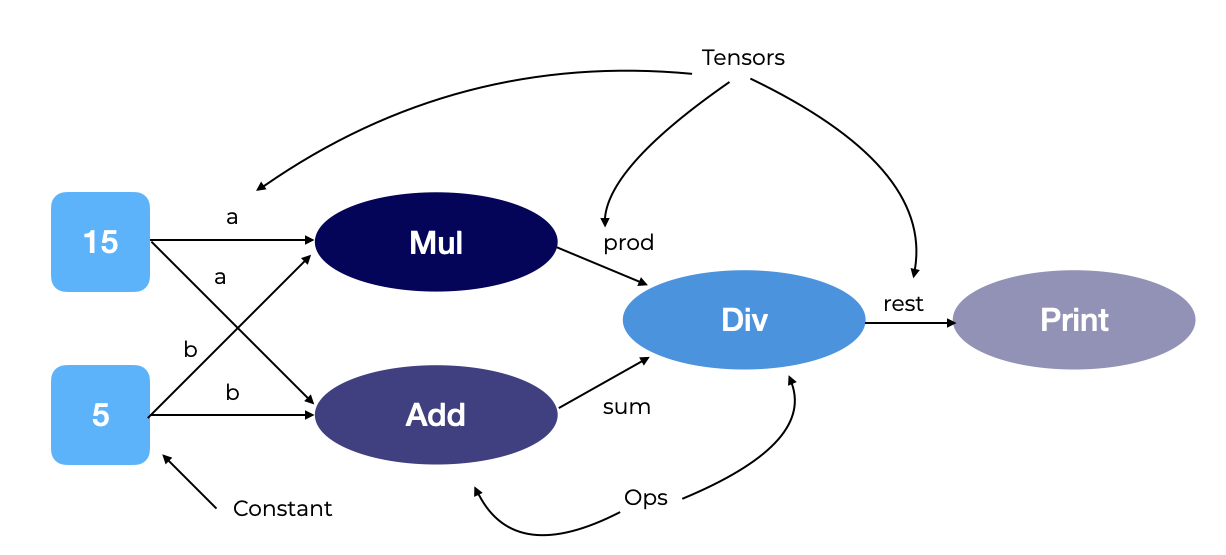

The **Computation graph** is the core concept around the auto-differentiation packages for optimization like TensorFlow or PyTorch. It is a way to represent all the computations your neural network does as a graph.
* Computation graph: a graph whose:
    * **Nodes**: represent operations, variables, or placeholders (i.e. the place where we feed model inputs to the graph)
    * **Edges**: represent data, or multi-dimensional arrays (i.e. Tensors) which flow through the different operations

**TensorFlow's static graph idea**:
* Step 1: to construct a computational graph first and compile the graph
* Step 2: for each execution, an input is fed into the graph
* Step 3: the calculations are carried out throughout the graph
* Step 4: the execution returns an output, which is produced by the computational graph

**Dynamic graph - PyTorch (and TF2.x)**: for each pass, PyTorch construct the computation graph from scratch.
* Advantages: easy-to-use, easy-to-debug, and easyto-understand
* Disadvantages: slower computation since we have to initialize the graph for every single run

For example:
```python
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x
```

* ``x`` is a leaf node (we create the tensor with ``requires_grad=True``).

* ``x ** 2`` creates a new tensor ``z``, and PyTorch remembers:

    * ``z`` came from ``Pow`` applied to ``x``.

* ``3 * x`` creates another tensor, PyTorch records that as ``Mul``.

* Adding them creates ``y``, and PyTorch records ``Add``.

What's going on underneath:
* Each tensor has a ``grad_fn`` attribute pointing to the operation that created it.
* PyTorch stitches these ops into a **DAG** as our Python code executes.

## `torch.autograd`
**`torch.autograd`**

`torch.autograd` provides classes and functions to implement automatic differentiation:

* Tracks operations performed on tensors.
* Builds a computation graph on the fly (dynamic graph).
* Provides the machinery to backpropagate through that graph and compute the gradients.

All we have to do is declare `torch.tensor`, for which gradients should be computed, with `requires_grad=True` argument, then use the implemented methods of `torch.autograd`

**How PyTorch derivates its variables**: the graph is differentiated using the chain rule, combining local derivatives into full gradients.


Let's see an example: <br>

**Backward passing with `torch.autograd`**: 

Consider the function below:<br>
$y = (2x + 3)^2$

That we could split in: <br>
* $u = (2x + 3)$ <br>
* $y = u^2$

We want to compute the derivative of y with respect to x

$\displaystyle \frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$


In [44]:
x = torch.randn(1, requires_grad=True) # we set requires_grad=True to track the operations for later automatic differentiation
u = 2 * x + 3
y = u ** 2

We can use 3 different methods to compute the gradients
* ``backward()`` (only applicable to scalar outputs)
* ``autograd.backward()`` (a more general version of ``backward()``
* ``autograd.grad()`` (returns gradients directly)

Method: `torch.autograd.backward(tensors, grad_tensors=None, retain_graph=None, create_graph=False, grad_variables=None)`
* Description: Computes the sum of gradients of given tensors with respect to the graph leaves. It does not return gradients but populates ``.grad``
* Arguments:
    * `tensors` (sequence of Tensors): tensors of which the derivative will be computed
    * `retain_graph` (bool, optional): if False, the graph used to compute the grad will be freed (dynamic graph), otherwise the graph will be retained (fixed graph)
    * `create_graph` (bool optional): if True, graph of the derivative will be constructed, allowing to compute higher-order derivative products


In [45]:
torch.autograd.backward(y, retain_graph=False)
print(f"Gradient of y with respect to x: {x.grad}")

Gradient of y with respect to x: tensor([10.8446])


Method: `torch.autograd.grad(outputs, inputs, grad_outputs=None, retain_graph=None, create_graph=False, only_inputs=True, allow_unused=False)`
* Description: computes and returns the sum of gradients of outputs w.r.t. the inputs directly, instead of storing them in ``grad``
* Arguments:
    - `outputs` (sequence of Tensor): outputs of the differentiated function
    - `inputs` (sequence of Tensor): inputs w.r.t which the gradient will be returned

It can be useful when:
- You want gradients for temporary computations.
- You don’t want to accumulate gradients in .grad.
- You need gradients for intermediate nodes in a computation graph

In [46]:
x = torch.randn(1, requires_grad=True)
u = 2 * x + 3
y = u ** 2

In [47]:
y_grad = torch.autograd.grad(y, x, retain_graph = False)
print(f"Gradient of y w.r.t x: {y_grad}")

Gradient of y w.r.t x: (tensor([5.0724]),)


***Note:*** We can **only perform gradient calculations using backward once on a given graph**, for performance reasons. If we need to do several backward calls on the same graph, we need to pass `retain_graph=True` to the backward call.

**Context manager * for gradient requirements (examples)**:

Sometimes we will have to turn on/off autograd as in the examples below.

In [48]:
with torch.autograd.no_grad():
    ...
    

In [49]:
with torch.autograd.enable_grad():
    ...

In [50]:
with torch.autograd.set_grad_enabled(True):
    ...

<small> *A context manager is an object that manages setup and cleanup automatically around a block of code, using with.

Method: ``backward()``
* Description: can only be called on scalar outputs (a single number). 

In [51]:
# Performs one step of backward propagation in the gradient
# y.backward()

In [52]:
# x.grad

In NNs, we use the model’s prediction and the corresponding target value to calculate the error (loss). The next step is to backpropagate this error through the network. Backward propagation is kicked off when we call `.backward()` on the error tensor. Autograd then calculates and stores the gradients for each model parameter in the parameter’s `.grad` attribute.

<br>

## 4. Building our first ML model with PyTorch 

### Linear Regression

- In order to illustrate how a typical ML flow works in PyTorch, we are going to do a very simple exercise with the very well known Linear Regression model:
- **y = Ax + B**
In this case, the model is not a NN but a linear function with two parameters, A and B
    - where A is the slope of curve
    - and B is the bias (point that intersect y-axis)
- For example, let's say that we have a second-hand car company with a very simple relation between the car prices and the number of cars sold. If the car price is low, more cars are sold. If the car price is high, we sell less cars. 
- We would like to predict how many cars we would sell if we increase the car price to 9000.

Some of the important libraries (for this exercise and for the future implementation of NNs)
### [nn](https://pytorch.org/docs/master/nn.html)
This library contains functions for building NNs and importing a loss function.
Some loss functions are:
* **binary_cross_entropy**: Function that measures the Binary Cross Entropy between the target and the output.
* **nll_loss**: measures the The negative log likelihood loss.
* **cross_entropy**: This criterion combines log_softmax and nll_loss in a single function.

### [optim](https://pytorch.org/docs/master/optim.html)
torch.optim is a package implementing various optimization algorithms. To construct an Optimizer you have to give it an iterable containing the parameters (all should be variables) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc. Some of the optimizers defined by this library are:
* **Adam**: It has been proposed in [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)
* **SGD**: Nesterov momentum is based on the formula from [On the importance of initialization and momentum in deep learning](http://www.cs.toronto.edu/~hinton/absps/momentum.pdf)
<br/>

In [53]:
# car_prices_array = [3,4,5,6,7,8,9]
# car_price_np = np.array(car_prices_array,dtype=np.float32)
# car_price_np = car_price_np.reshape(-1,1)
# car_price_tensor = torch.tensor(data=car_price_np,device="cuda")

# # torch.from_numpy(car_price_np)
# print(car_price_tensor.device)

cuda:0
cuda:0


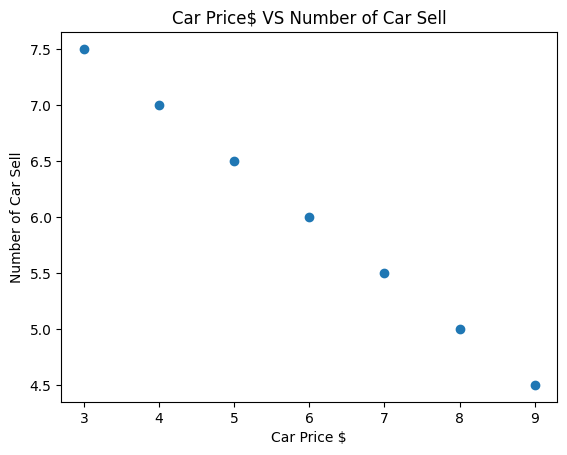

In [54]:
# As a car company we collect this data from previous sales
# lets define the vector with car prices (in thousands)
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = torch.tensor(data=car_price_np,device="cuda")

# torch.from_numpy(car_price_np)
print(car_price_tensor.device)

# lets define number of cars sold per month
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = torch.tensor(data=number_of_car_sell_np,device="cuda")

print(number_of_car_sell_tensor.device)

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

### Steps to follow to create a basic ML training loop with PyTorch:

1. **Import Libraries**: The code begins by importing the necessary libraries, including `torch` for PyTorch functionalities, `torch.nn` for neural network modules, and `warnings` to suppress warning messages.


2. **Create the Model Class**: A custom class named `LinearRegression` is defined, which inherits from `nn.Module`. Inside this class, a linear function is defined as `self.linear` using the `nn.Linear` module. The constructor `_init_` sets up the linear function with the specified input and output dimensions.  


3. **Instantiate the Model**: An instance of the `LinearRegression` model is created with input and output dimensions both set to 1, creating a one-dimensional linear regression model.  


4. **Define the Loss Function**: The Mean Squared Error loss function (`mse`) is defined using `nn.MSELoss()`. This loss is commonly used for regression tasks and measures the average squared difference between predictions and actual targets.  


5. **Set up Optimization**: In this case, Stochastic Gradient Descent (SGD) is chosen as the optimization algorithm to minimize the loss. The learning rate (`learning_rate`) determines the step size for updating the model parameters.  


6. **Train the Model**: The model is trained using a loop that iterates `iteration_number` times. Within each iteration, the following steps are performed:
   - The gradients are reset to zero using `optimizer.zero_grad()`.
   - Input data (`car_price_tensor`) is fed into the model to obtain predictions (`results`).
   - The loss is computed between the predictions and the target data (`number_of_car_sell_tensor`).
   - Backpropagation is performed to calculate gradients of the model parameters with respect to the loss.
   - The optimizer updates the model parameters based on the computed gradients using `optimizer.step()`.
   - The loss value is appended to `loss_list` for tracking the training progress.


7. Visualize Loss: Finally, the code uses `matplotlib` to plot the loss (`loss_list`) against the number of iterations, giving a visual representation of how the loss decreases during training.

epoch 0, loss 50.9887809753418
epoch 50, loss 6.137139320373535
epoch 100, loss 4.147122383117676
epoch 150, loss 2.8023838996887207
epoch 200, loss 1.8936882019042969
epoch 250, loss 1.2796459197998047
epoch 300, loss 0.8647102117538452
epoch 350, loss 0.5843208432197571
epoch 400, loss 0.3948498070240021
epoch 450, loss 0.2668168246746063
epoch 500, loss 0.18029962480068207
epoch 550, loss 0.12183581292629242
epoch 600, loss 0.08232980221509933
epoch 650, loss 0.05563347786664963
epoch 700, loss 0.0375935323536396
epoch 750, loss 0.025403615087270737
epoch 800, loss 0.017166387289762497
epoch 850, loss 0.011600022204220295
epoch 900, loss 0.007838386110961437
epoch 950, loss 0.005296797025948763
epoch 1000, loss 0.003579268231987953


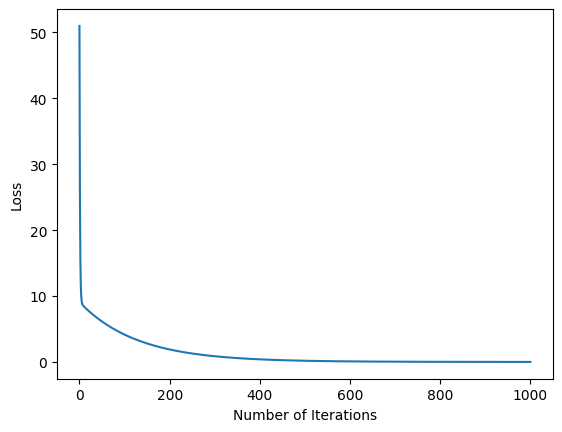

In [57]:
# Linear Regression with Pytorch

# 1. Import libraries
import torch      
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

# 2. Create model class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# 3. Instanciate the model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1
model.to("cuda")
# 4. Define loss function: MSE
mse = nn.MSELoss()

# 5. Set up optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# 6. Training loop
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # Optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.item())
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))


# 7. Visualize loss
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

### Exercise:

Congratulations! we just trained our first model on a dataset (though this was a very simple task). We have done it in the CPU, but we could do even better if we did all the computations in the GPU. For this, we need to pass all the relevant objects to the GPU, as we saw previously in this notebook 